In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Better ways to limit values in a numpy vector 

The power of numpy is that if we can write a one-liner, it will be really fast. So we should try to avoid for loops, if possible. 

For a playground situation let's create a numpy array with only one negative element, and then let's find a way to set this element to 0. So like limiting from below in our geese-meese situation. 

<IPython.core.display.Javascript object>


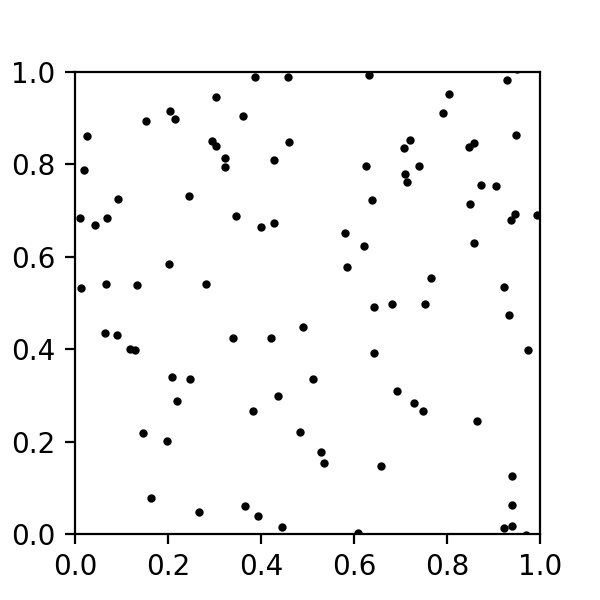

In [5]:
%matplotlib notebook

n_animals = 100
n_steps = 100
vmin = 0.01   # Something speed-like
vmax = 0.05
trap_size = 0.4

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)


# Plotting
fig = plt.figure(figsize=(3,3))
fig.show()
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.canvas.draw()



#capture
color = np.where(np.logical_and(x<trap_size, y<trap_size), 1, 0)
n_marked = np.sum(color)
estimation = np.zeros(n_steps)



for t in range(n_steps):
    x += vx
    y += vy

    vx = np.where(np.logical_or(x>1, x<0), -vx, vx)
    vy = np.where(np.logical_or(y>1, y<0), -vy, vy)
    
    #Recapture
    n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
    n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size))*color
    
   
    
    ax.clear()
    
    plt.plot(x,y,'k.',markersize=2);
    plt.plot(x[color==0],y[color==0],'k.',markersize=4);
    plt.plot(x[color==1],y[color==1],'k.',markersize=4);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() # <--------------- The main command to make it move
    #time.sleep(0.01)